# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Ishpreet | Kapoor | Ishpreet | Hours | 25% |
| Member 2: | Negar | Raika | Negar Raika, Oct 18 2024 | 5 | 25% |
| Member 3: | Jasleen | Badhesha | Jasleen Badhesha | 5 | 25% |
| Member 4: | Deep | Patel | Deep Patel, Oct 18 2024 | Hours | 25% |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

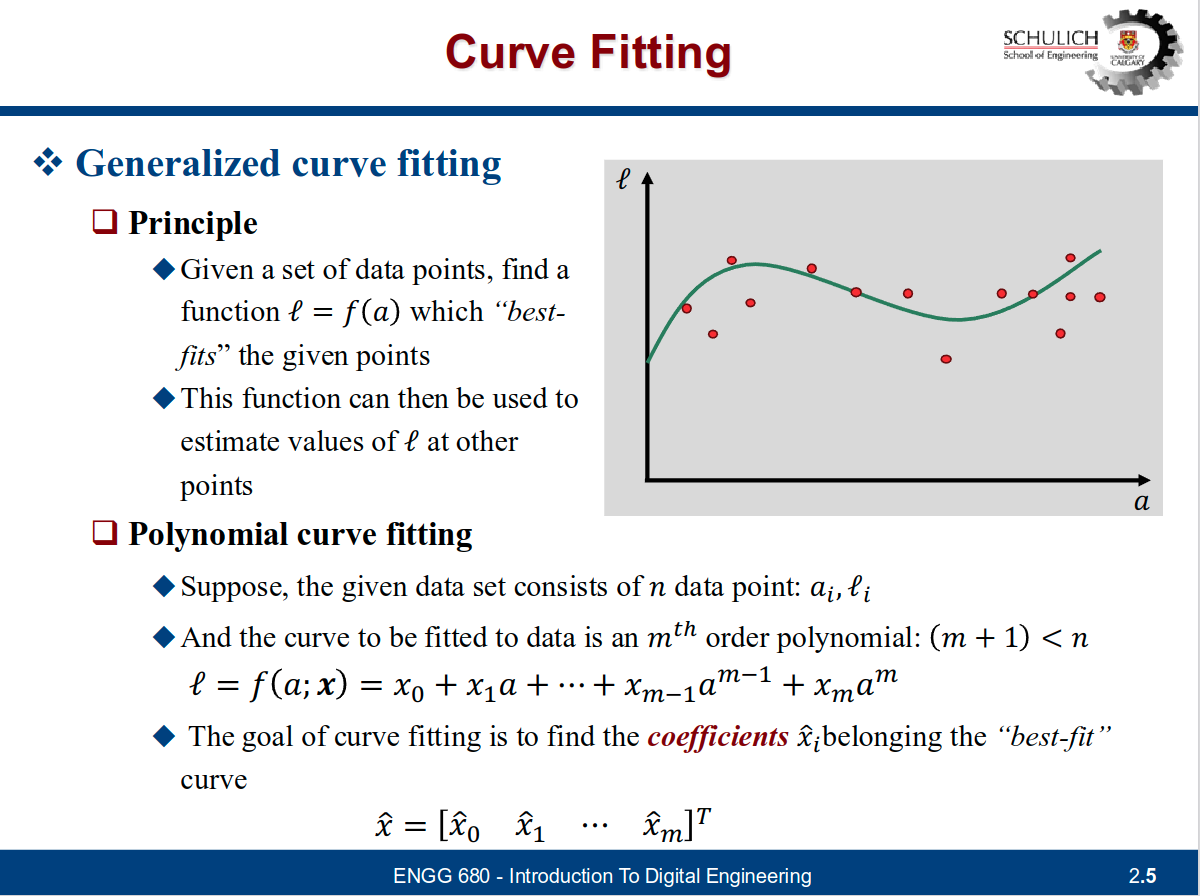

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [4]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
#mounting google drive so we can access the data files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)

df_data = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2/data.xlsx')
arr_data = df_data.to_numpy() #this will convert the data into an array

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = arr_data[:, 0]       # Noisy observations (first column)
l_var = arr_data[:, 1]    # Variance of observations (second column)
l_true = arr_data[:, 2]   # True observations (third column)

In [ ]:
# step 3
# define the number of observation n
# (1 mark)
n = len(l)
#print(n) #wanted to make sure we had the correct number of observations (500)

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.eye(n) #this creates the identity matrix; a 2D array with 1's as the diagonal and 0's everywhere else
#print(P) #printing this to make sure that the matrix is correctly printed

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)

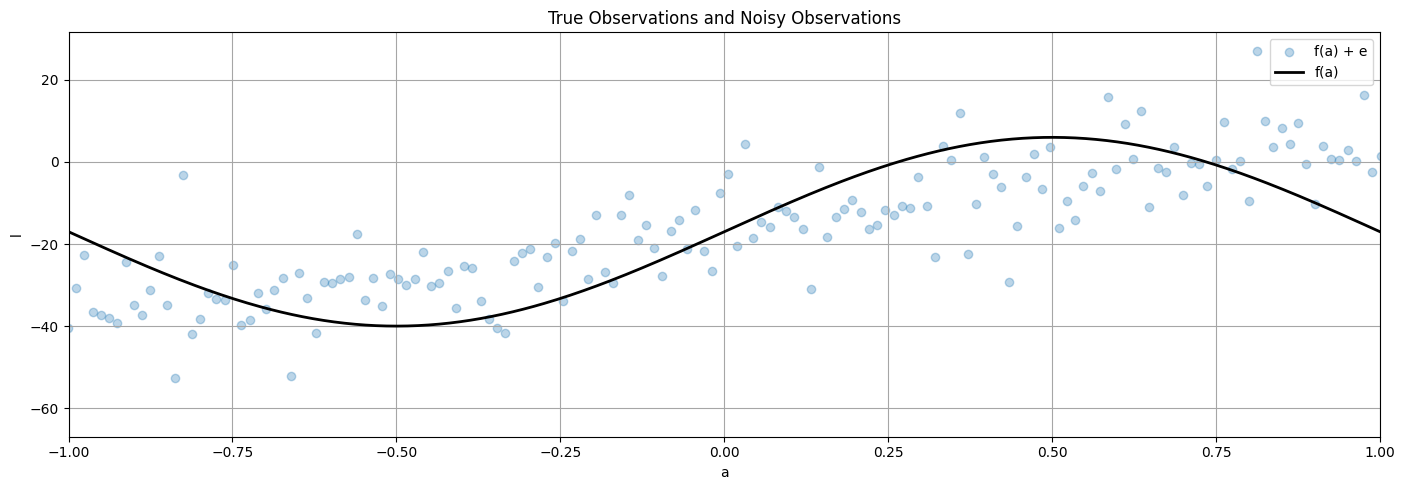

In [ ]:
# step 4
# plotting the true and noisy observations together in one single figure
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# creating scatter plot for noisy observation plotting, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
ax.scatter(a, l, label="f(a) + e", color='tab:blue', marker='o', alpha=0.3)
a_scale = np.linspace(-1, 1, n)

# creating scatter plot for true observation, label it as "f(a)"" and set color as 'k'
ax.plot(a_scale, l_true, label="f(a)", color='k', linewidth=2)

# creating axis labels, legend and title
ax.set_xlabel("a")
ax.set_ylabel("l")
ax.set_title("True Observations and Noisy Observations")
ax.legend()

ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()

# scaling the range of x-axis to be -1 to 1
ax.set_xlim([-1, 1])

# keep this format for the rest of the plots in this lab assignment
# (2 marks)

plt.show() # display the plot


In [ ]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''

    # constructing the design matrix A for polynomial fitting
    A = np.vander(a, deg + 1, increasing=True)

    # calculating the normal equations using the LSE formula: A^T *P *A = A^T * P * l
    A_T_P_A = A.T @ P @ A # left side
    A_T_P_l = A.T @ P @ l # right side

    # solving for the coefficients x (best-fit polynomial)
    x = np.linalg.solve(A_T_P_A, A_T_P_l)

    # calulating the residuals - difference between the noisy observations (l) and the fitted values (v)
    v = l - A @ x

    # calculating the a posterior variance factor (goodness of fit), by taking the redidual variance divided by the degres of freedom
    apv = (v.T @ P @ v) / (n - (deg +1))

    # compute the covariance matrix of the estimated coefficients
    cov_x = apv * np.linalg.inv(A_T_P_A)

    return (x, cov_x, apv, v)



In [ ]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)
degrees = [1, 3, 5]

#fetching the results into an empty dictionary for each degree
results = {}

for deg in degrees:
  x, cov_x, apv, v = fit_polynomial_curve(a, l, P, deg)

#storing the following values into our dictionary for each degree
  results[deg] = {
    'coefficients' : x,
    'covariance' : cov_x,
    'posterior_variance' : apv,
    'residuals' : v
  }

print(results[3]["posterior_variance"]) #testing to see what gets printed for one of the degrees!


66.13227783131883


In [ ]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

#line_uw = np.polyval(x, a)
#cubic_uw = np.polyval(x, a)
#quintic_uw = np.polyval(x, a)

# Initialize arrays to store the evaluated polynomial functions
line_uw = np.polyval(results[1]['coefficients'][::-1], a)   # For degree 1
cubic_uw = np.polyval(results[3]['coefficients'][::-1], a)  # For degree 3
quintic_uw = np.polyval(results[5]['coefficients'][::-1], a) # For degree 5

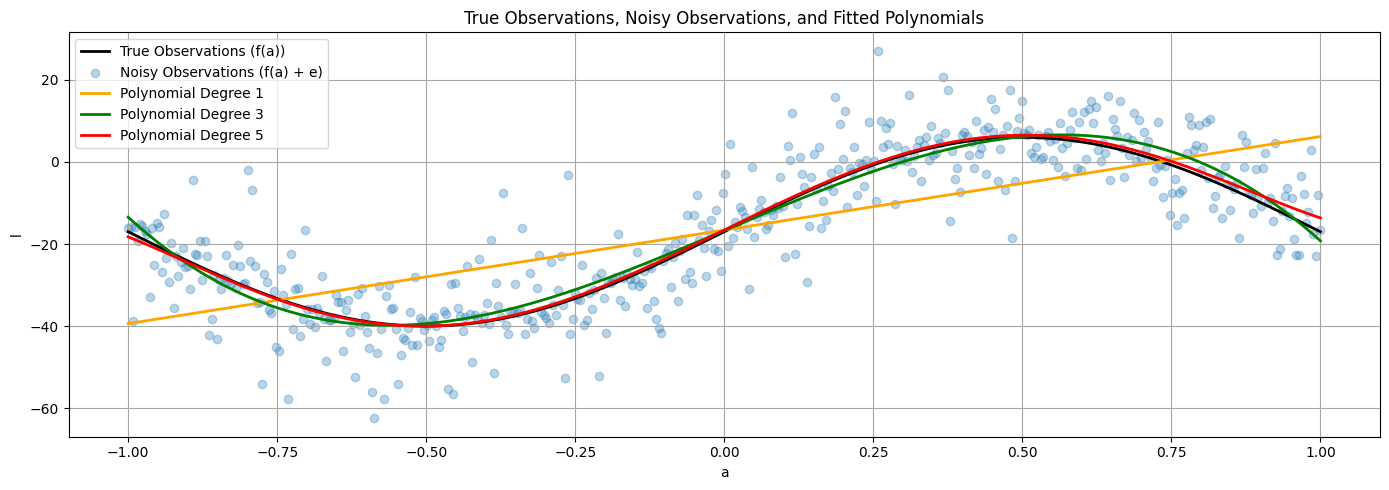

In [ ]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# plotting true observations
ax.plot(a_scale, l_true, label="True Observations (f(a))", color='k', linewidth=2)

# plotting noisy observations
ax.scatter(a_scale, l, label="Noisy Observations (f(a) + e)", color='tab:blue', marker='o', alpha=0.3)    #ISK_Change

# plotting polynomials
ax.plot(a_scale, line_uw, label="Polynomial Degree 1", color='orange', linewidth=2)
ax.plot(a_scale, cubic_uw, label="Polynomial Degree 3", color='green', linewidth=2)
ax.plot(a_scale, quintic_uw, label="Polynomial Degree 5", color='red', linewidth=2)

# setting axis
ax.set_xlabel("a")
ax.set_ylabel("l")
ax.set_title("True Observations, Noisy Observations, and Fitted Polynomials")


ax.grid(True, which='both',ls='-',color='0.65')
ax.legend()

fig.tight_layout()

plt.show()

In [ ]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)


for deg, res in zip(degrees, results):
    apv = res[2]  # Accessing the third element in the tuple (apv)
    print(f"A posterior variance factor for degree {deg} is {apv}")


#for deg in degrees:
#  apv = results[deg]['posterior_variance']
#  print(f" A posterior variance factor for degree {deg} is {apv}")


#for deg in degrees:
 # x, cov_x, apv, v = fit_polynomial_curve(a, l, P, deg)
 # print(f"A Posteriori Variance Factor for Degree {deg} Polynomial: {results[deg]['posterior_variance']}")


TypeError: 'int' object is not subscriptable

In [ ]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)
norm_deg1 = np.linalg.norm(line_uw - l_true)    # Norm for first degree
norm_deg3 = np.linalg.norm(cubic_uw - l_true)  # Norm for third degree
norm_deg5 = np.linalg.norm(quintic_uw - l_true)  # Norm for fifth degree

# Print the results
print(f"Norm between Polynomial Degree 1 and True Observations: {norm_deg1}")
print(f"Norm between Polynomial Degree 3 and True Observations: {norm_deg3}")
print(f"Norm between Polynomial Degree 5 and True Observations: {norm_deg5}")

Norm between Polynomial Degree 1 and True Observations: 38.285979929116664
Norm between Polynomial Degree 3 and True Observations: 38.285979929116664
Norm between Polynomial Degree 5 and True Observations: 17.369967196966478


In [ ]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)
# As the degree of the function increases, the posterior variance factor and norms decrase.
# This indicates that the functions of a higher degree produce a more accurate fit to the data.


In [ ]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
P = np.diag(1/l_var)

In [ ]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)
#setting the degrees to 1, 3, and 5
degrees = [1, 3, 5]

#repeating step 6
# initialize new dictionary to store the weighted results
results_weighted = {}

# loop through each degree, call the function with the weighted P, and store the results
for deg in degrees:
    x, cov_x, apv, v = fit_polynomial_curve(a, l, P, deg)

    # Store the results in a dictionary for each of the specified values
    results_weighted[deg] = {
        'coefficients': x,
        'covariance': cov_x,
        'posterior_variance': apv,
        'residuals': v
    }

# reverse the order of the coefficients to match the format expected by np.polyval
line_w = np.polyval(results_weighted[1]['coefficients'][::-1], a)    # Degree 1 (linear)
cubic_w = np.polyval(results_weighted[3]['coefficients'][::-1], a)   # Degree 3 (cubic)
quintic_w = np.polyval(results_weighted[5]['coefficients'][::-1], a) # Degree 5 (quintic)

# Compute the norm between the predicted observations and the true observations
norm_line_w = np.linalg.norm(line_w - l_true) #degree of 1
norm_cubic_w = np.linalg.norm(cubic_w - l_true) #degree of 3
norm_quintic_w = np.linalg.norm(quintic_w - l_true) #degree of 5

# Extract A Posteriori Variance Factor (APV) for each degree
apv_deg1_w = results_weighted[1]['posterior_variance']
apv_deg3_w = results_weighted[3]['posterior_variance']
apv_deg5_w = results_weighted[5]['posterior_variance']

# Print the A Posteriori Variance Factor and Norm for each polynomial function
print(f"A Posteriori Variance Factor for Linear Fit with Weights: {apv_deg1_w}")
print(f"A Posteriori Variance Factor for Cubic Fit with Weights: {apv_deg3_w}")
print(f"A Posteriori Variance Factor for Quintic Fit with Weights: {apv_deg5_w}")

print(f"\nNorm between Linear Fit and True Observations with Weights: {norm_line_w}")
print(f"Norm between Cubic Fit and True Observations with Weights: {norm_cubic_w}")
print(f"Norm between Quintic Fit and True Observations with Weights: {norm_quintic_w}")

A Posteriori Variance Factor for Linear Fit with Weights: 12.054651233436907
A Posteriori Variance Factor for Cubic Fit with Weights: 1.1444647026537131
A Posteriori Variance Factor for Quintic Fit with Weights: 0.9447009043856552

Norm between Linear Fit and True Observations with Weights: 230.67760813832942
Norm between Cubic Fit and True Observations with Weights: 36.07026687266801
Norm between Quintic Fit and True Observations with Weights: 5.7416069158864955


In [ ]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
# The difference between the weighted LSE and unweighted LSE is that the variance and norms are smaller for all degrees in the weighted calculations.
# This is due to the different weights that are applied in the weighted model. Higher weights are assigned to the points which we know to be more accurate.
# As a result, the residues would be smaller, making the variance and norms smaller as well.

# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

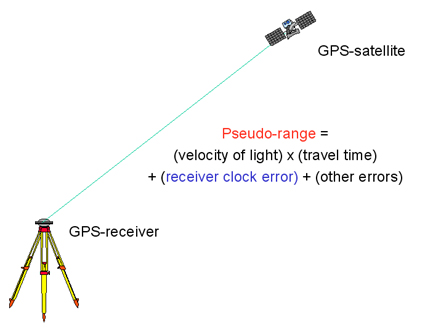

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [6]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
df_pseudorange = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2/pseudoranges.xlsx')
df_sat_pos = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2/satellite_position.xlsx')

pseudorange = df_pseudorange.to_numpy()
sat_pos = df_sat_pos.to_numpy()

In [7]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = len(pseudorange)
m = len(sat_pos)

In [8]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)
P =  np.identity(n)

In [9]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = np.zeros(m)

In [10]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

In [11]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = np.ones(m)
i = 0
arr_w = []
arr_delta=[]
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

In [12]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
def euclidean_norm(receiver_pos, satellite_pos):
  distance = np.sqrt(np.sum((receiver_pos - satellite_pos)**2, axis=1))
  return distance


In [ ]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(r_pos, s_pos, rho):
  #...
  return A

In [ ]:
# step 9
# start the iteration for the LSE (11 marks in total)
# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)

convergence_criteria = True  # Replace with actual convergence criteria, e.g., np.linalg.norm(delta[:3]) > 0.001
i = 0
arr_w = []
arr_delta = []
arr_err_pos = []
arr_i = []


while (convergence_criteria):

       # compute the geometri distance between Satellites and receiver, using the euclidean_norm function we just defined
       # (1 marks)
       rho = euclidean_norm(r_pos, sat_pos)

       # compute the design matrix A
       # (1 marks)
       A = design_matrix(r_pos, sat_pos, rho_measured )

       # compute the misclosure array w
       # (1 marks)
       w = rho_measured - rho_computed

       # compute the corrections delta
       # (1 marks)
       delta =  np.linalg.inv(A.T @ P @ A) @ (A.T @ P @ w)

       # update the states
       # (1 marks)
       x_hat = r_pos + delta[:3]
       r_pos = x_hat

       # compute the position error from using the updated states against groundtruth
       # (1 marks)
       err_pos = np.linalg.norm(r_pos - r_pos_true)


       # update the counter i, (i.e., increament of 1 for each iteration)
       # (1 mark)
       i += 1


       # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
       # (1 marks)
       arr_w.append(w)
       arr_delta.append(delta)
       arr_err_pos.append(err_pos)
       arr_i.append(i)

       convergence_criteria = np.linalg.norm(delta[:3]) > 0.001



# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
apv =

# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = #...
```

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)

convergence_criteria = True  # Replace with actual convergence criteria, e.g., np.linalg.norm(delta[:3]) > 0.001


while (convergence_criteria):

       # compute the geometri distance between Satellites and receiver, using the euclidean_norm function we just defined
       # (1 marks)
       rho = euclidean_norm(r_pos, sat_pos)

       # compute the design matrix A
       # (1 marks)
       A = design_matrix(r_pos, sat_pos, rho_measured )

       # compute the misclosure array w
       # (1 marks)
       w = rho_measured - rho_computed

       # compute the corrections delta
       # (1 marks)
       delta =  np.linalg.inv(A.T @ P @ A) @ (A.T @ P @ w)

       # update the states
       # (1 marks)
       x_hat = #


       # compute the position error from using the updated states against groundtruth
       # (1 marks)
       err_pos = #...


       # update the counter i, (i.e., increament of 1 for each iteration)
       # (1 mark)
       i += 1


       # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
       # (1 marks)
       arr_w #...
       arr_delta #...
       arr_err_pos #...
       arr_i #...




# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
apv = #...

# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = #...
```
       # (1 marks)
       rho = euclidean_norm(r_pos, sat_pos)

       # compute the design matrix A
       # (1 marks)
       A = design_matrix(r_pos, sat_pos, rho_measured )

       # compute the misclosure array w
       # (1 marks)
       w = rho_measured - rho_computed

       # compute the corrections delta
       # (1 marks)
       delta =  np.linalg.inv(A.T @ P @ A) @ (A.T @ P @ w)

       # update the states
       # (1 marks)
       x_hat = #


       # compute the position error from using the updated states against groundtruth
       # (1 marks)
       err_pos = #...


       # update the counter i, (i.e., increament of 1 for each iteration)
       # (1 mark)


       # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
       # (1 marks)
       arr_w #...
       arr_delta #...
       arr_err_pos #...
       arr_i #...




# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
apv = #...

# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = #...




SyntaxError: invalid syntax (<ipython-input-24-36256fd6cc24>, line 5)

In [ ]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)




In [ ]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)

In [ ]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)


# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)


# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)

In [ ]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)

In [ ]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
